# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy import stats
medical = pd.read_csv('insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ From histogram we can observe that it is highly right skewed it means it may contain outliers and In general mean and std get affected by outliers. so mean and standard deviation are not normally distribued and its values are not appropriate.

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

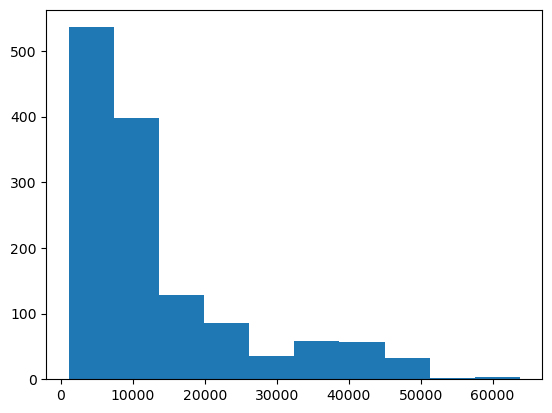

In [7]:
plt.hist(medical['charges'], bins=10)

In [8]:
x = medical['charges'].dropna().to_numpy()
xbar = np.mean(x)
#S_mean = np.mean(medical['charges'])
print('Mean of medical charges',xbar)

Mean of medical charges 13270.422265141257


In [9]:
#S_std = np.std(medical['charges'], ddof =1)
s = np.std(x, ddof=1)
print('Std of medical charges', s)

Std of medical charges 12110.011236694001


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ As we know the data represent random sample of charges and we know its mean and standard deviation and we know that administer is concern about actual charges means(population mean) has fallen below 12000. As population standard deviation is unknown so we will use t test for frequentist test 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ as administer concern about population means is fallen below 12000 so it means our hypothesized value is directional so we will use one sided and as it is below 12000 so we will use one sided (left-tailed) and we calculated the one-sided 95% lower confidence bound. The lower bound of the confidence interval is 12,725.48 which is above 12,000. This means that, with 95% confidence, the true mean charge is greater than 12,725. Therefore, the administrator’s concern that the mean has fallen below 12,000 is not justified given the sample data.We are failed to reject (Ho) because p_left value is >0.05 i.e. 0.99.

In [10]:
# for 95 % CI we have 5 % error on left side (L, Infinity), the true mean μ lies above L with 95% confidence.In a one-sided 95% lower bound, 
#the cutoff is at the point where 95% of the distribution is to the left. If 
#L>12000: with 95% confidence the true mean exceeds 12,000 ⇒ the admin need not be concerned.
#If μ<12000 at 95% confidence ⇒ concern is justified (or gather more data).


In [40]:
n = x.size
n

1338

In [41]:
mu0 = 12000
df = n - 1
se = s/ np.sqrt(n)
t_stat = (xbar - mu0) / se

In [46]:
p_lower = t.cdf(t_stat, df) # left-tail probability
p_lower

np.float64(0.9999349141739535)

In [45]:
# one-sample left-tailed t-test: H0: mu = 12000, Ha: mu < 12000
# one-sided 95% LOWER bound for mu
t_star_lower = t.ppf(0.95, df=df)
mulower_95_one_sided = xbar - t_star_lower * se

print('mulower_95_one_sided',mulower_95_one_sided)


mulower_95_one_sided 12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Here we will use Hypotheses (two-sided) because it is asking for different  charges. 
hypothesis H0 is µins = µuninsu and H1 = µins != µuninsu
assumptions: 
1. The two samples are independent and each group’s observations are Independent and Identically Distributed(i.i.d)
2. The outcome (charges) in each group is approximately normal (or  n is large so CLT applies).
3. Equal population variences for both insurance and uninsurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The p-value is far below 0.05 and the CI excludes 0, so we reject H0. There is strong evidence that mean charges differ between insured and uninsured patients

In [33]:
m0 = medical.loc[medical['insuranceclaim']==1, 'charges'].dropna() # insured charges
m1 =  medical.loc[medical['insuranceclaim']==0, 'charges'].dropna() # unisured charges

In [37]:
# static values by using scipy stats function that is giving statistic,pvalue
statistic,pvalue = stats.ttest_ind(m0, m1, equal_var = True)
print(statistic,pvalue)

11.893299030876712 4.461230231620717e-31


In [35]:
# manual test steps
n0 = m0.size
n1 = m1.size
x0 = np.mean(m0)
x1 = np.mean(m1)
s0 = np.std(m0, ddof =1)
s1 = np.std(m1, ddof =1)
print(n0,n1)
print(x0,x1)
print(s0,s1)

783 555
16423.928276537677 8821.421892306305
14045.928418802127 6446.510126811736


In [39]:
# Pooled SD
sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2) / (n0 + n1 - 2))
Se = sp * np.sqrt(1/n0 + 1/n1)
# t-test statistic
t_manual = (x0 - x1) / Se

# Degrees of freedom for pooled-variance t test
df = n0 + n1 - 2
# t.sf(z, df) = 1 - t.cdf(z, df) gives the RIGHT-TAIL probability P(T > z).
p_manual = 2 * t.sf(abs(t_manual), df=df)
print('manual_t',t_manual,'manual_p',p_manual)
# For 95% CI interval for two sided t value is 0.975
t_star =  t.ppf(0.975, df=df)
ci_low  = (x0 - x1) - t_star * Se
ci_high = (x0 - x1) + t_star * Se
print('CI range',ci_low,ci_high)


manual_t 11.893299030876715 manual_p 4.4612302316205886e-31
CI range 6348.510322806037 8856.502445656708


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__SciPy provides t-tests but not z-tests, because in practice the population standard deviation σ is rarely known. The t-test substitutes the sample standard deviation and uses the t-distribution to account for added uncertainty. For large samples, the t-test approaches the z-test. If a true z-test is needed, you must implement the formula manually or use statsmodels.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test